In [2]:
import pylab as plt
%matplotlib inline
from scipy import signal
import numpy as np
a = np.outer(signal.gaussian(100, 8), signal.gaussian(100, 8))

In [59]:
from scipy.fftpack import dct, idct
def _next_regular(target):
    """
    Find the next regular number greater than or equal to target.
    Regular numbers are composites of the prime factors 2, 3, and 5.
    Also known as 5-smooth numbers or Hamming numbers, these are the optimal
    size for inputs to FFTPACK.
    Target must be a positive integer.
    """
    if target <= 6:
        return target

    # Quickly check if it's already a power of 2
    if not (target & (target-1)):
        return target

    match = float('inf')  # Anything found will be smaller
    p5 = 1
    while p5 < target:
        p35 = p5
        while p35 < target:
            # Ceiling integer division, avoiding conversion to float
            # (quotient = ceil(target / p35))
            quotient = -(-target // p35)

            # Quickly find next power of 2 >= quotient
            try:
                p2 = 2**((quotient - 1).bit_length())
            except AttributeError:
                # Fallback for Python <2.7
                p2 = 2**(len(bin(quotient - 1)) - 2)

            N = p2 * p35
            if N == target:
                return N
            elif N < match:
                match = N
            p35 *= 3
            if p35 == target:
                return p35
        if p35 < match:
            match = p35
        p5 *= 5
        if p5 == target:
            return p5
    if p5 < match:
        match = p5
    return match

def dctconved(a,b):
    '''
    this is for two dimentional convolve; maybe can be applied to 1 dimention
    example:
    a = np.arange(2000).reshape(200,10)
    b = (np.ones_like(a).astype('float'))/(np.ones_like(a).sum())
    c = dctconved(a,b)
    '''

    shape = np.array(a.shape) + np.array(b.shape) -1
    fshape = [_next_regular(int(d)) for d in shape]
    pada = np.zeros(fshape); padb = np.zeros(fshape)
    pada[:a.shape[0], :a.shape[1]]=a
    padb[:b.shape[0], :b.shape[1]]=b
    scale = 1./np.sqrt(fshape[0]*fshape[1])
    a = scale*dct(dct(a, type = 2, axis=-1), type = 2, axis = 0)
    b = scale*dct(dct(b, type = 2, axis=-1), type = 2, axis = 0)
    conved = idct(idct(a*b,type=1, axis=-1),axis=0)/4.
    
    return conved

array([ 49.5])

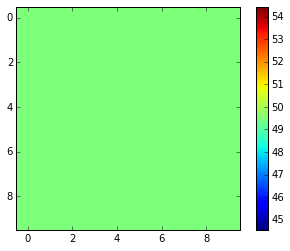

In [60]:
import pylab as plt
%matplotlib inline
a = np.arange(100).reshape(10,10)
b = (np.ones_like(a).astype('float'))/(np.ones_like(a).sum())
c = dctconved(a,b)
plt.imshow(c)
plt.colorbar()
np.unique(c)

In [121]:
a = np.random.random(100)
b = np.random.random(10)
L = b.shape[0]
N = a.shape[0]

In [122]:
lens = L+N
M = lens-1
M

109

In [123]:
p1 = np.ceil((L-3)/2.)
p2 = (N-3)/2
p = np.ceil(3.*M/2.)
p1,p2

(4.0, 48)

In [124]:
pada = np.zeros(p)
padb = np.zeros(p)

/data/store01/data_dirs/students/ucfafyi/.conda/envs/my_root/lib/python2.7/site-packages/ipykernel/__main__.py:1: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  if __name__ == '__main__':
/data/store01/data_dirs/students/ucfafyi/.conda/envs/my_root/lib/python2.7/site-packages/ipykernel/__main__.py:2: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app


In [125]:
pada[p1:p1+N] = a
padb[p2:p2+L] = b

/data/store01/data_dirs/students/ucfafyi/.conda/envs/my_root/lib/python2.7/site-packages/ipykernel/__main__.py:1: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  if __name__ == '__main__':


In [126]:
from scipy import convolve

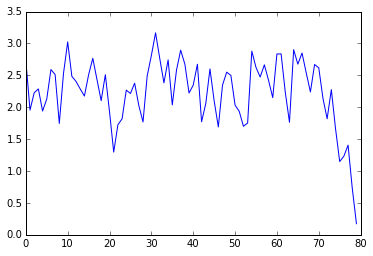

In [175]:
plt.plot(convolve(pada,padb, 'same')[:80])

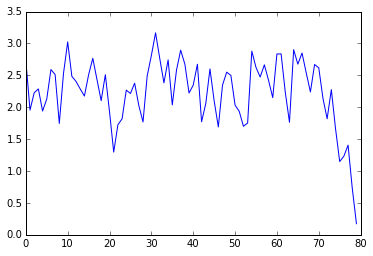

In [174]:
plt.plot(signal.fftconvolve(pada,padb,'same')[:80])

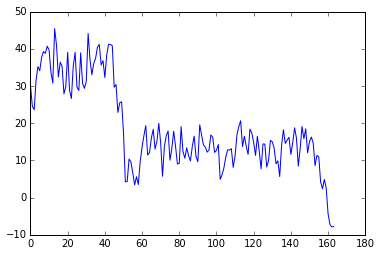

In [208]:
import sys
sys.path.insert(0,'python')
from smoothn import *
x = dctND(pada)
y = dctND(padb)
x_y = dctND(y*x, f=idct)*pada.shape[0]
plt.plot(x_y)

/data/store01/data_dirs/students/ucfafyi/.conda/envs/my_root/lib/python2.7/site-packages/ipykernel/__main__.py:1: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  if __name__ == '__main__':


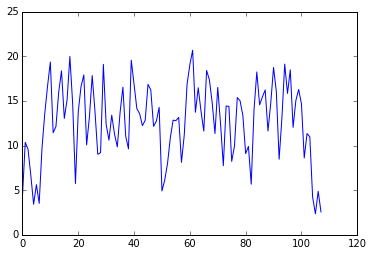

In [203]:
plt.plot(x_y[p1+p2:p1+p2+M-1])

/data/store01/data_dirs/students/ucfafyi/.conda/envs/my_root/lib/python2.7/site-packages/ipykernel/__main__.py:5: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


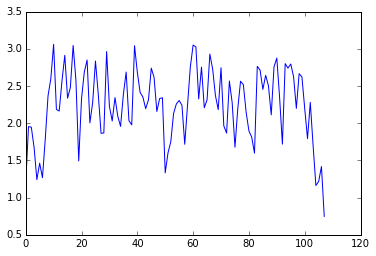

In [206]:
scale = 2*np.sqrt(dcta.shape[0]*dctb.shape[0])
dcta = dct(pada, type=2, axis=-1)
dctb = dct(padb, type=2, axis=-1)
conved = idct(dcta*dctb,axis=-1, type=1)
plt.plot((conved/scale)[p1+p2:p1+p2+M-1])

In [207]:
from scipy.fftpack import dct, idct
def _next_regular(target):
    """
    Find the next regular number greater than or equal to target.
    Regular numbers are composites of the prime factors 2, 3, and 5.
    Also known as 5-smooth numbers or Hamming numbers, these are the optimal
    size for inputs to FFTPACK.
    Target must be a positive integer.
    """
    if target <= 6:
        return target

    # Quickly check if it's already a power of 2
    if not (target & (target-1)):
        return target

    match = float('inf')  # Anything found will be smaller
    p5 = 1
    while p5 < target:
        p35 = p5
        while p35 < target:
            # Ceiling integer division, avoiding conversion to float
            # (quotient = ceil(target / p35))
            quotient = -(-target // p35)

            # Quickly find next power of 2 >= quotient
            try:
                p2 = 2**((quotient - 1).bit_length())
            except AttributeError:
                # Fallback for Python <2.7
                p2 = 2**(len(bin(quotient - 1)) - 2)

            N = p2 * p35
            if N == target:
                return N
            elif N < match:
                match = N
            p35 *= 3
            if p35 == target:
                return p35
        if p35 < match:
            match = p35
        p5 *= 5
        if p5 == target:
            return p5
    if p5 < match:
        match = p5
    return match

def dctconved(a,b):
    '''
    this is for two dimentional convolve; maybe can be applied to 1 dimention
    example:
    a = np.arange(2000).reshape(200,10)
    b = (np.ones_like(a).astype('float'))/(np.ones_like(a).sum())
    c = dctconved(a,b)
    '''

    shape = np.array(a.shape) + np.array(b.shape) -1
    fshape = [_next_regular(int(d)) for d in shape]
    scale = 1./np.sqrt(fshape[0]*fshape[1])
    
    a = scale*dct(dct(a,type=2, axis=0), type = 2, axis = -1)
    b = scale*dct(dct(b,type=2, axis=0), type = 2, axis = -1)
    conved = idct(idct(a*b,type=1, axis=-1),type = 1,axis=0)/4.
    return conved